In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('Employee Data.csv')

In [3]:
print(dataset.head)

<bound method NDFrame.head of        EMP_Id Gender  Age_at_recruitment Education_Level  \
0     1712499      F                  19             O/L   
1     1712742      F                  38       Secondary   
2     1712934      F                  21             O/L   
3     1713114      F                  30             O/L   
4     1713145      F                  29       Secondary   
...       ...    ...                 ...             ...   
6560   413127      F                  20       Secondary   
6561   413130      M                  22       Secondary   
6562  4118961      F                  23       Secondary   
6563  1713026      F                  35             O/L   
6564  1954997      F                  30       Secondary   

     Marital_Status_at_recruitment Have_Children_at_recruitment Work_Location  \
0                           SINGLE                 NO CHILDEREN           KGL   
1                          MARRIED                HAVE CHILDREN           KGL   
2     

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6565 entries, 0 to 6564
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EMP_Id                         6565 non-null   int64  
 1   Gender                         6565 non-null   object 
 2   Age_at_recruitment             6565 non-null   int64  
 3   Education_Level                6564 non-null   object 
 4   Marital_Status_at_recruitment  6560 non-null   object 
 5   Have_Children_at_recruitment   6565 non-null   object 
 6   Work_Location                  6563 non-null   object 
 7   Office_Distance                6563 non-null   float64
 8   Prior_Experience               6564 non-null   float64
 9   No_of_Previous Employers       6562 non-null   float64
 10  Interview result               6564 non-null   float64
 11  Final test results             6563 non-null   float64
 12   Initial Salary                6561 non-null   f

In [5]:
null_data = dataset[dataset.isnull().any(axis=1)]

In [7]:
print(null_data)
print(null_data.count)

       EMP_Id Gender  Age_at_recruitment Education_Level  \
2     1712934      F                  21             O/L   
1649  1914749      F                  25             A/L   
1651  1914757      F                  21             NaN   
1652  1914758      F                  20       Secondary   
1653  1914768      F                  24       Secondary   
2228  1712531      F                  35             A/L   
2232  1712889      F                  36             A/L   
2234  1712917      F                  32             O/L   
3431  1712960      F                  21             A/L   
6342  1914770      F                  31       Secondary   
6563  1713026      F                  35             O/L   
6564  1954997      F                  30       Secondary   

     Marital_Status_at_recruitment Have_Children_at_recruitment Work_Location  \
2                              NaN                 NO CHILDEREN           KGL   
1649                       MARRIED                HAVE CH

In [8]:
updated_dataset = dataset.dropna(axis=0)

In [9]:
updated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6553 entries, 0 to 6562
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EMP_Id                         6553 non-null   int64  
 1   Gender                         6553 non-null   object 
 2   Age_at_recruitment             6553 non-null   int64  
 3   Education_Level                6553 non-null   object 
 4   Marital_Status_at_recruitment  6553 non-null   object 
 5   Have_Children_at_recruitment   6553 non-null   object 
 6   Work_Location                  6553 non-null   object 
 7   Office_Distance                6553 non-null   float64
 8   Prior_Experience               6553 non-null   float64
 9   No_of_Previous Employers       6553 non-null   float64
 10  Interview result               6553 non-null   float64
 11  Final test results             6553 non-null   float64
 12   Initial Salary                6553 non-null   float6

In [10]:
#Mapping categorical variables in to numerical
Gender_dict = updated_dataset["Gender"].value_counts()
print(Gender_dict)
    
Gender_dict_new = {
    'M':       0,
    'F':         1,
}
print(Gender_dict_new)

Gender
F    5666
M     887
Name: count, dtype: int64
{'M': 0, 'F': 1}


In [11]:
updated_dataset.head()

,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,Religion,Meal Apply,JOB Grade,Last/Current Salary,Age,Marital_Status,Have_Children,Leaving Reason,Service Months,Status_2021
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,BUDDHISM,YES,A+,34000.0,22,SINGLE,NO CHILDEREN,-,39,Active
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,BUDDHISM,YES,C,26850.0,41,MARRIED,HAVE CHILDREN,-,35,Active
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,BUDDHISM,YES,A,34350.0,32,MARRIED,HAVE CHILDREN,-,29,Active
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,BUDDHISM,YES,C,27400.0,31,MARRIED,HAVE CHILDREN,-,28,Active
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,BUDDHISM,YES,A,32500.0,23,SINGLE,NO CHILDEREN,-,25,Active


In [12]:
def gender(x):
    if str(x) in Gender_dict_new.keys():
        return Gender_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Gender"].apply(gender)
updated_dataset['New Gender'] = data_l
updated_dataset.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32732\4143336609.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New Gender'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,Meal Apply,JOB Grade,Last/Current Salary,Age,Marital_Status,Have_Children,Leaving Reason,Service Months,Status_2021,New Gender
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,YES,A+,34000.0,22,SINGLE,NO CHILDEREN,-,39,Active,1
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,YES,C,26850.0,41,MARRIED,HAVE CHILDREN,-,35,Active,1
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,YES,A,34350.0,32,MARRIED,HAVE CHILDREN,-,29,Active,1
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,YES,C,27400.0,31,MARRIED,HAVE CHILDREN,-,28,Active,1
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,YES,A,32500.0,23,SINGLE,NO CHILDEREN,-,25,Active,1


In [13]:
Education_Level_dict = updated_dataset["Education_Level"].value_counts()
print(Education_Level_dict)
    
Education_Level_dict_new = {
    'Secondary':       0,
    'O/L':         1,
    'A/L':         2,
}

def education_Level(x):
    if str(x) in Education_Level_dict_new.keys():
        return Education_Level_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Education_Level"].apply(education_Level)
updated_dataset['New Education_Level'] = data_l
updated_dataset.head()

Education_Level
Secondary    3600
O/L          2328
A/L           625
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_32732\1578753775.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New Education_Level'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,JOB Grade,Last/Current Salary,Age,Marital_Status,Have_Children,Leaving Reason,Service Months,Status_2021,New Gender,New Education_Level
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,A+,34000.0,22,SINGLE,NO CHILDEREN,-,39,Active,1,1
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,C,26850.0,41,MARRIED,HAVE CHILDREN,-,35,Active,1,0
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,A,34350.0,32,MARRIED,HAVE CHILDREN,-,29,Active,1,1
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,C,27400.0,31,MARRIED,HAVE CHILDREN,-,28,Active,1,0
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,A,32500.0,23,SINGLE,NO CHILDEREN,-,25,Active,1,2


In [14]:
Marital_Status_at_recruitment_dict = updated_dataset["Marital_Status_at_recruitment"].value_counts()
print(Marital_Status_at_recruitment_dict)
    
Marital_Status_at_recruitment_dict_new = {
    'SINGLE':       0,
    'MARRIED':         1,
    }

def marital_Status_at_recruitment(x):
    if str(x) in Marital_Status_at_recruitment_dict_new.keys():
        return Marital_Status_at_recruitment_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Marital_Status_at_recruitment"].apply(marital_Status_at_recruitment)
updated_dataset['New Marital_Status_at_recruitment'] = data_l
updated_dataset.head()

Marital_Status_at_recruitment
SINGLE     3388
MARRIED    3165
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_32732\1055759494.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New Marital_Status_at_recruitment'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,Last/Current Salary,Age,Marital_Status,Have_Children,Leaving Reason,Service Months,Status_2021,New Gender,New Education_Level,New Marital_Status_at_recruitment
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,34000.0,22,SINGLE,NO CHILDEREN,-,39,Active,1,1,0
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,26850.0,41,MARRIED,HAVE CHILDREN,-,35,Active,1,0,1
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,34350.0,32,MARRIED,HAVE CHILDREN,-,29,Active,1,1,1
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,27400.0,31,MARRIED,HAVE CHILDREN,-,28,Active,1,0,1
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,32500.0,23,SINGLE,NO CHILDEREN,-,25,Active,1,2,0


In [15]:
Have_Children_at_recruitment_dict = updated_dataset["Have_Children_at_recruitment"].value_counts()
print(Have_Children_at_recruitment_dict)
    
Have_Children_at_recruitment_dict_new = {
    'NO CHILDEREN':       0,
    'HAVE CHILDREN':         1,
    }

def have_Children_at_recruitment(x):
    if str(x) in Have_Children_at_recruitment_dict_new.keys():
        return Have_Children_at_recruitment_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Have_Children_at_recruitment"].apply(have_Children_at_recruitment)
updated_dataset['New Have_Children_at_recruitment'] = data_l
updated_dataset.head()

Have_Children_at_recruitment
NO CHILDEREN     3808
HAVE CHILDREN    2745
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_32732\2311157484.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New Have_Children_at_recruitment'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,Age,Marital_Status,Have_Children,Leaving Reason,Service Months,Status_2021,New Gender,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,22,SINGLE,NO CHILDEREN,-,39,Active,1,1,0,0
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,41,MARRIED,HAVE CHILDREN,-,35,Active,1,0,1,1
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,32,MARRIED,HAVE CHILDREN,-,29,Active,1,1,1,1
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,31,MARRIED,HAVE CHILDREN,-,28,Active,1,0,1,1
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,23,SINGLE,NO CHILDEREN,-,25,Active,1,2,0,0


In [16]:
Work_Location_dict = updated_dataset["Work_Location"].value_counts()
print(Work_Location_dict)
    
Work_Location_dict_new = {
    'KGL':       0,
    'PAN':         1,
    'TAL':         2,
    'TLD':         3,
    }

def work_Location(x):
    if str(x) in Work_Location_dict_new.keys():
        return Work_Location_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Work_Location"].apply(work_Location)
updated_dataset['New Work_Location'] = data_l
updated_dataset.head()

Work_Location
TAL    2010
KGL    1783
TLD    1661
PAN    1099
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_32732\2432904491.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New Work_Location'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,Marital_Status,Have_Children,Leaving Reason,Service Months,Status_2021,New Gender,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,SINGLE,NO CHILDEREN,-,39,Active,1,1,0,0,0
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,MARRIED,HAVE CHILDREN,-,35,Active,1,0,1,1,0
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,MARRIED,HAVE CHILDREN,-,29,Active,1,1,1,1,0
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,MARRIED,HAVE CHILDREN,-,28,Active,1,0,1,1,0
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,SINGLE,NO CHILDEREN,-,25,Active,1,2,0,0,0


In [128]:
Direct_Indirect_dict = updated_dataset["Direct_Indirect"].value_counts()
print(Direct_Indirect_dict)
    
Direct_Indirect_dict_new = {
    'DIRECT':       0,
    'INDIRECT':         1,
 
    }

def direct_Indirect (x):
    if str(x) in Direct_Indirect_dict_new.keys():
        return Direct_Indirect_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Direct_Indirect"].apply(direct_Indirect)
updated_dataset['New Direct_Indirect'] = data_l
updated_dataset.head()

DIRECT      3595
INDIRECT    2958
Name: Direct_Indirect, dtype: int64


<ipython-input-128-20d02216b022>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New Direct_Indirect'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,Have_Children,Leaving Reason,Service Months,Status_2021,New Gender,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location,New Direct_Indirect
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,NO CHILDEREN,-,39,Active,1,1,0,0,0,1
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,HAVE CHILDREN,-,35,Active,1,0,1,1,0,0
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,HAVE CHILDREN,-,29,Active,1,1,1,1,0,0
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,HAVE CHILDREN,-,28,Active,1,0,1,1,0,0
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,NO CHILDEREN,-,25,Active,1,2,0,0,0,0


In [129]:
Department_dict = updated_dataset["Department"].value_counts()
print(Department_dict)
    
Department_dict_new = {
    'BONDING':       0,
    'CUTTING':         1,
    'EMBELLISHMENT':         2,
    'EMBROIDERY':         3,
    'FABRIC INSPECTION':         4,
    'FINISHING':         5,
    'PAD PRINTING':         6,
    'PRODUCT DEV':         7,
    'PRODUCTION':         8,
    'QUALITY ASSURANCE':         9,
    'TRAINING SCHOOL':         10,
    'WAREHOUSE':         11,
    }

def department (x):
    if str(x) in Department_dict_new.keys():
        return Department_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Department"].apply(department)
updated_dataset['New Department'] = data_l
updated_dataset.head()

PRODUCTION           3629
TRAINING SCHOOL      1139
FINISHING             479
QUALITY ASSURANCE     451
CUTTING               353
BONDING               178
WAREHOUSE             142
FABRIC INSPECTION      83
EMBROIDERY             37
EMBELLISHMENT          36
PRODUCT DEV            19
PAD PRINTING            7
Name: Department, dtype: int64


<ipython-input-129-0fac236cc0f2>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New Department'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,Leaving Reason,Service Months,Status_2021,New Gender,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location,New Direct_Indirect,New Department
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,-,39,Active,1,1,0,0,0,1,8
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,-,35,Active,1,0,1,1,0,0,8
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,-,29,Active,1,1,1,1,0,0,8
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,-,28,Active,1,0,1,1,0,0,8
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,-,25,Active,1,2,0,0,0,0,8


In [130]:
Religion_dict = updated_dataset["Religion"].value_counts()
print(Religion_dict)
    
Religion_dict_new = {
    'BUDDHISM':       0,
    'HINDUISM':         1,
    'CHRISTIANITY':         2,
    'ISLAM':         3,
        }

def religion (x):
    if str(x) in Religion_dict_new.keys():
        return Religion_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Religion"].apply(religion)
updated_dataset['New Religion'] = data_l
updated_dataset.head()

BUDDHISM        4058
HINDUISM        2304
CHRISTIANITY     131
ISLAM             60
Name: Religion, dtype: int64


<ipython-input-130-a076868a5c5e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New Religion'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,Service Months,Status_2021,New Gender,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location,New Direct_Indirect,New Department,New Religion
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,39,Active,1,1,0,0,0,1,8,0
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,35,Active,1,0,1,1,0,0,8,0
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,29,Active,1,1,1,1,0,0,8,0
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,28,Active,1,0,1,1,0,0,8,0
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,25,Active,1,2,0,0,0,0,8,0


In [131]:
Meal_Apply_dict = updated_dataset["Meal Apply"].value_counts()
print(Meal_Apply_dict)
    
Meal_Apply_dict_new = {
     'YES':         1,
           }

def meal_Apply (x):
    if str(x) in Meal_Apply_dict_new.keys():
        return Meal_Apply_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Meal Apply"].apply(meal_Apply)
updated_dataset['New_Meal_Apply'] = data_l
updated_dataset.head()

YES    6553
Name: Meal Apply, dtype: int64


<ipython-input-131-bdca7cf01351>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New_Meal_Apply'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,Status_2021,New Gender,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location,New Direct_Indirect,New Department,New Religion,New_Meal_Apply
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,Active,1,1,0,0,0,1,8,0,1
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,Active,1,0,1,1,0,0,8,0,1
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,Active,1,1,1,1,0,0,8,0,1
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,Active,1,0,1,1,0,0,8,0,1
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,Active,1,2,0,0,0,0,8,0,1


In [132]:
JOB_Grade_dict = updated_dataset["JOB Grade"].value_counts()
print(JOB_Grade_dict)
    
JOB_Grade_dict_new = {
     'A+':         0,
    'A':         1,
    'B':         2,
    'C':         3,
    'D':         4,
           }

def jOB_Grade (x):
    if str(x) in JOB_Grade_dict_new.keys():
        return JOB_Grade_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["JOB Grade"].apply(jOB_Grade)
updated_dataset['New_JOB_Grade'] = data_l
updated_dataset.head()

D     3662
C     1176
B      777
A      571
A+     367
Name: JOB Grade, dtype: int64


<ipython-input-132-52f6f4491dde>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New_JOB_Grade'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,New Gender,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location,New Direct_Indirect,New Department,New Religion,New_Meal_Apply,New_JOB_Grade
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,1,1,0,0,0,1,8,0,1,0
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,1,0,1,1,0,0,8,0,1,3
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,1,1,1,1,0,0,8,0,1,1
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,1,0,1,1,0,0,8,0,1,3
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,1,2,0,0,0,0,8,0,1,1


In [133]:
Have_Children_dict = updated_dataset["Have_Children"].value_counts()
print(Have_Children_dict)
    
Have_Children_dict_new = {
    'NO CHILDEREN':       0,
    'HAVE CHILDREN':         1,
    }

def have_Children(x):
    if str(x) in Have_Children_dict_new.keys():
        return Have_Children_dict_new[str(x)]
    else:
        return '0'
    
data_l = updated_dataset["Have_Children"].apply(have_Children)
updated_dataset['New_Have_Children'] = data_l
updated_dataset.head()

NO CHILDEREN     3768
HAVE CHILDREN    2785
Name: Have_Children, dtype: int64


<ipython-input-133-075aa645ca77>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New_Have_Children'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location,New Direct_Indirect,New Department,New Religion,New_Meal_Apply,New_JOB_Grade,New_Have_Children
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,1,0,0,0,1,8,0,1,0,0
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,0,1,1,0,0,8,0,1,3,1
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,1,1,1,0,0,8,0,1,1,1
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,0,1,1,0,0,8,0,1,3,1
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,2,0,0,0,0,8,0,1,1,0


In [134]:
Marital_Status_dict = updated_dataset["Marital_Status"].value_counts()
print(Marital_Status_dict)
    
Marital_Status_dict_new = {
    'SINGLE':       0,
    'MARRIED':         1,
    }

def marital_Status(x):
    if str(x) in Marital_Status_dict_new.keys():
        return Marital_Status_dict_new[str(x)]
    else:
        return 'other status'
    
data_l = updated_dataset["Marital_Status"].apply(marital_Status)
updated_dataset['New Marital_Status'] = data_l
updated_dataset.head()

SINGLE     3301
MARRIED    3252
Name: Marital_Status, dtype: int64


<ipython-input-134-2ed79beab5eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset['New Marital_Status'] = data_l


,EMP_Id,Gender,Age_at_recruitment,Education_Level,Marital_Status_at_recruitment,Have_Children_at_recruitment,Work_Location,Office_Distance,Prior_Experience,No_of_Previous Employers,...,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location,New Direct_Indirect,New Department,New Religion,New_Meal_Apply,New_JOB_Grade,New_Have_Children,New Marital_Status
0,1712499,F,19,O/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,0,0,0,1,8,0,1,0,0,0
1,1712742,F,38,Secondary,MARRIED,HAVE CHILDREN,KGL,4.0,17.0,5.0,...,1,1,0,0,8,0,1,3,1,1
3,1713114,F,30,O/L,MARRIED,HAVE CHILDREN,KGL,3.0,9.0,3.0,...,1,1,0,0,8,0,1,1,1,1
4,1713145,F,29,Secondary,MARRIED,HAVE CHILDREN,KGL,2.0,8.0,2.0,...,1,1,0,0,8,0,1,3,1,1
5,1713383,F,21,A/L,SINGLE,NO CHILDEREN,KGL,4.0,0.0,0.0,...,0,0,0,0,8,0,1,1,0,0


In [135]:
x_array = np.array(updated_dataset['Age_at_recruitment'])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)


[[0.00906694 0.01813389 0.01431623 ... 0.00954415 0.01049857 0.01097577]]


In [136]:
dataset1 = updated_dataset.drop(['EMP_Id','New_Meal_Apply'], axis = 1)

In [137]:
dataset1.describe()

,Age_at_recruitment,Office_Distance,Prior_Experience,No_of_Previous Employers,Interview result,Final test results,Initial Salary,Last/Current Salary,Age,Service Months,...,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location,New Direct_Indirect,New Department,New Religion,New_JOB_Grade,New_Have_Children,New Marital_Status
count,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6553.00000,6553.000000,6553.000000,...,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000,6553.000000
mean,25.006562,15.078590,2.479628,0.825576,4.005341,3.913170,22143.178697,23406.56951,25.472150,6.187090,...,0.546009,0.482985,0.418892,1.541584,0.451396,7.550893,0.419045,3.097970,0.424996,0.496261
std,6.692335,15.033167,4.821406,1.443568,1.244942,1.432208,3969.791303,5322.39814,6.755782,8.221267,...,0.662346,0.499749,0.493415,1.139996,0.497670,2.518530,0.581736,1.233134,0.494380,0.500024
min,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15500.000000,15500.00000,16.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,0.000000,0.000000,3.000000,3.000000,20500.000000,20500.00000,20.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,2.000000,0.000000,0.000000
50%,23.000000,14.000000,0.000000,0.000000,4.000000,5.000000,20500.000000,21050.00000,23.000000,3.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,8.000000,0.000000,4.000000,0.000000,0.000000
75%,29.000000,23.000000,2.000000,1.000000,5.000000,5.000000,25300.000000,27300.00000,29.000000,7.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,9.000000,1.000000,4.000000,1.000000,1.000000
max,46.000000,89.000000,24.000000,20.000000,5.000000,5.000000,31200.000000,36500.00000,46.000000,43.000000,...,2.000000,1.000000,1.000000,3.000000,1.000000,11.000000,3.000000,4.000000,1.000000,1.000000


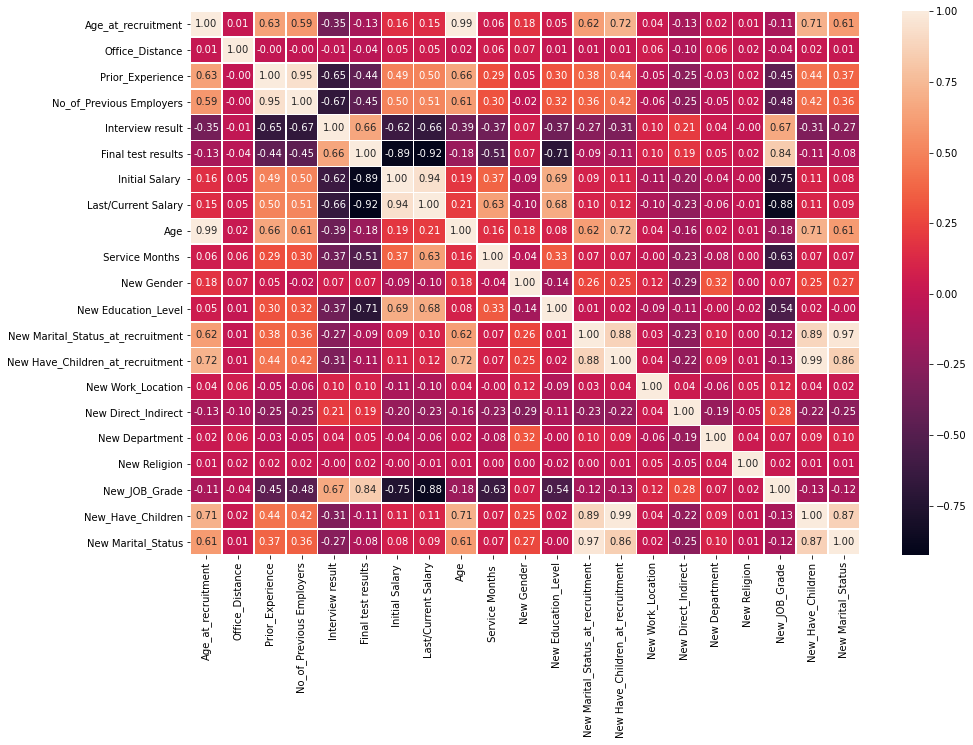

In [138]:
#Let's make our correlation matrix visual
corr_matrix=dataset1.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [139]:
Vstatus_dict = updated_dataset["Status_2021"].value_counts()
Vstatus_dict

Inactive    3734
Active      2819
Name: Status_2021, dtype: int64

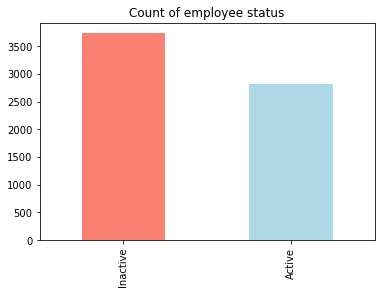

In [140]:
updated_dataset['Status_2021'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of employee status")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

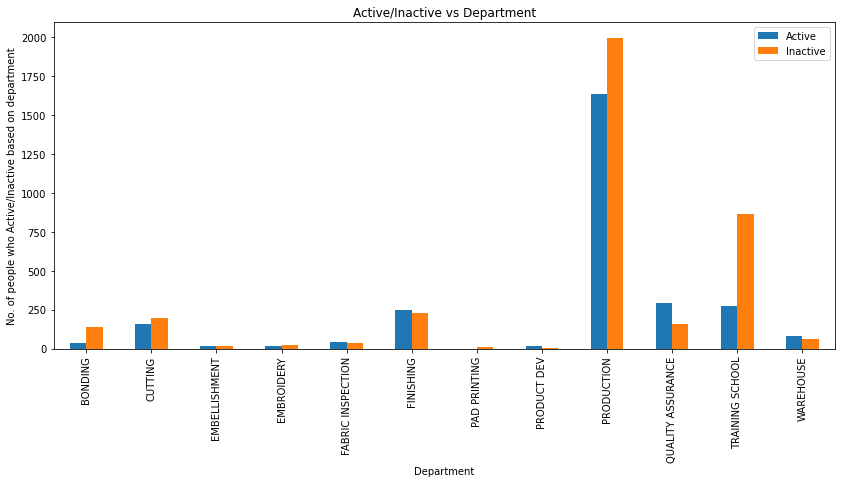

In [141]:
pd.crosstab(updated_dataset['Department'],updated_dataset['Status_2021']).plot(kind="bar",figsize=(14,6))
plt.title("Active/Inactive vs Department")
plt.xlabel("Department")
plt.ylabel("No. of people who Active/Inactive based on department")
plt.legend(["Active","Inactive"])
plt.xticks(rotation=90)

In [142]:
updated_dataset.columns

Index(['EMP_Id', 'Gender', 'Age_at_recruitment', 'Education_Level',
       'Marital_Status_at_recruitment', 'Have_Children_at_recruitment',
       'Work_Location', 'Office_Distance', 'Prior_Experience',
       'No_of_Previous Employers', 'Interview result', 'Final test results',
       ' Initial Salary ', 'Direct_Indirect', 'Department', 'Religion',
       'Meal Apply', 'JOB Grade', 'Last/Current Salary', 'Age',
       'Marital_Status', 'Have_Children', 'Leaving Reason', ' Service Months ',
       'Status_2021', 'New Gender', 'New Education_Level',
       'New Marital_Status_at_recruitment', 'New Have_Children_at_recruitment',
       'New Work_Location', 'New Direct_Indirect', 'New Department',
       'New Religion', 'New_Meal_Apply', 'New_JOB_Grade', 'New_Have_Children',
       'New Marital_Status'],
      dtype='object')

In [143]:
updated_dataset.drop(['EMP_Id', "Gender", "Education_Level", "Marital_Status_at_recruitment", "Have_Children_at_recruitment", "Work_Location", "Interview result", "Final test results"
              , "Direct_Indirect", 'Meal Apply', 'JOB Grade', 'Have_Children', 'Leaving Reason' ],axis=1,inplace=True)

dataset2 = updated_dataset.drop(['Marital_Status','Religion','Department','New_Meal_Apply'], axis = 1)
dataset2.columns

C:\Users\Dilina\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['Age_at_recruitment', 'Office_Distance', 'Prior_Experience',
       'No_of_Previous Employers', ' Initial Salary ', 'Last/Current Salary',
       'Age', ' Service Months ', 'Status_2021', 'New Gender',
       'New Education_Level', 'New Marital_Status_at_recruitment',
       'New Have_Children_at_recruitment', 'New Work_Location',
       'New Direct_Indirect', 'New Department', 'New Religion',
       'New_JOB_Grade', 'New_Have_Children', 'New Marital_Status'],
      dtype='object')

In [144]:
# Target 
"""
def Target(x):
    if x in "Active":
        return False
    else:
        return True
    
data_l = dataset2['Status_2021'].apply(Target)
dataset2['Status_2021'] = data_l
"""
dataset2['Status_2021'].head()

0    Active
1    Active
3    Active
4    Active
5    Active
Name: Status_2021, dtype: object

In [145]:
dataset2.to_csv("processed table.csv")

In [146]:
dataset = pd.read_csv("processed table.csv",index_col=[0])
dataset = pd.DataFrame(dataset)
y = dataset["Status_2021"]
X = dataset.drop("Status_2021",axis=1)


In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.head()

,Age_at_recruitment,Office_Distance,Prior_Experience,No_of_Previous Employers,Initial Salary,Last/Current Salary,Age,Service Months,New Gender,New Education_Level,New Marital_Status_at_recruitment,New Have_Children_at_recruitment,New Work_Location,New Direct_Indirect,New Department,New Religion,New_JOB_Grade,New_Have_Children,New Marital_Status
5905,18,0.0,0.0,0.0,20500.0,20500.0,18,2,1,0,0,0,3,1,10,1,4,0,0
2649,24,30.0,2.0,1.0,28100.0,31100.0,25,11,1,1,1,1,0,0,8,0,1,1,1
1031,19,15.0,0.0,0.0,26500.0,32500.0,21,19,0,1,1,0,1,0,8,1,1,0,1
6477,22,0.0,0.0,0.0,20500.0,20500.0,22,1,1,0,0,0,1,1,10,0,4,0,0
2465,22,30.0,1.0,1.0,20550.0,20550.0,22,2,1,0,1,1,2,0,8,2,4,1,1


In [148]:
#Feature Scaling
#Scale the values in the data to be values between 0 to 1 inclusive
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.exceptions import NotFittedError

In [150]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [151]:
for a,b in zip([lr,dt,knn],["Logistic Regression","Decision Tree","KNN"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.792636
[Logistic Regression] test data accuracy is : 0.821510
[Decision Tree] training data accuracy is : 0.998474
[Decision Tree] test data accuracy is : 0.927536
[KNN] training data accuracy is : 0.913773
[KNN] test data accuracy is : 0.831426


In [152]:
for a,b in zip([svm,rm,gnb],["SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[SVM] training data accuracy is : 0.809615
[SVM] test data accuracy is : 0.832189
[Random Forest] training data accuracy is : 0.998474
[Random Forest] test data accuracy is : 0.956522
[Naive Bayes] training data accuracy is : 0.714994
[Naive Bayes] test data accuracy is : 0.744470


In [153]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.8215102974828375,
 'KNN classifier': 0.8314263920671243,
 'Support Vector Machine': 0.8321891685736079,
 'Random forest': 0.9565217391304348,
 'Decision tree': 0.927536231884058,
 'Naive Bayes': 0.7444698703279939}

In [154]:
feature_dict=dict(zip(X.columns,list(lr.coef_[0])))
feature_dict

{'Age_at_recruitment': -0.366465303293767,
 'Office_Distance': 0.7295548920156718,
 'Prior_Experience': -0.6003143256852839,
 'No_of_Previous Employers': 0.6627357464012802,
 ' Initial Salary ': -1.7098676166677504,
 'Last/Current Salary': -1.186659128214268,
 'Age': 0.6044261186331623,
 ' Service Months ': -0.5117064990866274,
 'New Gender': 0.22535349124842463,
 'New Education_Level': 0.2600607059585626,
 'New Marital_Status_at_recruitment': -0.6868635708569203,
 'New Have_Children_at_recruitment': -0.5685206595000095,
 'New Work_Location': 0.016929286700966405,
 'New Direct_Indirect': -0.13754845823947243,
 'New Department': -0.1984303537504201,
 'New Religion': -0.1618684897133437,
 'New_JOB_Grade': -1.2497965230202426,
 'New_Have_Children': 0.5909528857797997,
 'New Marital_Status': 0.7323049840233207}

In [155]:
#Classification Report of Random forest

from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

      Active       0.95      0.95      0.95       561
    Inactive       0.96      0.96      0.96       750

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311


In [156]:
#Classification Report of Decision tree
from sklearn.metrics import classification_report

dt_y_preds = dt.predict(X_test)

print(classification_report(y_test,dt_y_preds))

              precision    recall  f1-score   support

      Active       0.92      0.91      0.91       561
    Inactive       0.93      0.94      0.94       750

    accuracy                           0.93      1311
   macro avg       0.93      0.92      0.93      1311
weighted avg       0.93      0.93      0.93      1311


In [157]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.82151,0.831426,0.832189,0.956522,0.927536,0.74447


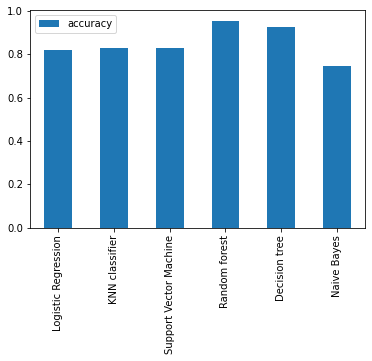

In [158]:
#Visualize the accuracy of each model
model_compare.T.plot(kind='bar') # (T is here for transpose)

In [159]:
import pickle

In [160]:
# Save the trained model as a pickle string.
saved_model = pickle.dumps(rm)

# Load the pickled model
rm_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
rm_from_pickle.predict(X_test)

array(['Inactive', 'Active', 'Inactive', ..., 'Inactive', 'Inactive',
       'Inactive'], dtype=object)

In [161]:
dt.fit(X_test, y_test)
for name, importance in zip(X.columns, dt.feature_importances_):
    print(name, importance)

Age_at_recruitment 0.042131105479459925
Office_Distance 0.19847729157521696
Prior_Experience 0.021546454415474453
No_of_Previous Employers 0.009636332543192514
 Initial Salary  0.08675920419258144
Last/Current Salary 0.4039209492653777
Age 0.023097741677197393
 Service Months  0.07532728609034972
New Gender 0.0025759462033971853
New Education_Level 0.04634782337043035
New Marital_Status_at_recruitment 0.0039686274509803925
New Have_Children_at_recruitment 0.0023368983957219257
New Work_Location 0.013319458689289854
New Direct_Indirect 0.005117524662305702
New Department 0.009122909173799338
New Religion 0.006978392383824134
New_JOB_Grade 0.04673950065837677
New_Have_Children 0.0020772430184194893
New Marital_Status 0.0005193107546048722


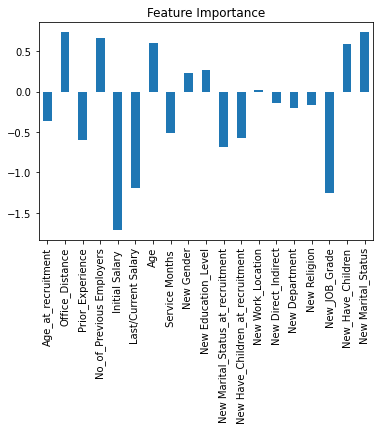

In [162]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

In [163]:
dt.feature_importances_

array([0.04213111, 0.19847729, 0.02154645, 0.00963633, 0.0867592 ,
       0.40392095, 0.02309774, 0.07532729, 0.00257595, 0.04634782,
       0.00396863, 0.0023369 , 0.01331946, 0.00511752, 0.00912291,
       0.00697839, 0.0467395 , 0.00207724, 0.00051931])

In [164]:
feature_importance=pd.DataFrame(dt.feature_importances_,index=X.columns,columns=['importance']).sort_values('importance',ascending=False)

In [165]:
feature_importance

,importance
Last/Current Salary,0.403921
Office_Distance,0.198477
Initial Salary,0.086759
Service Months,0.075327
New_JOB_Grade,0.046740
New Education_Level,0.046348
Age_at_recruitment,0.042131
Age,0.023098
Prior_Experience,0.021546
New Work_Location,0.013319


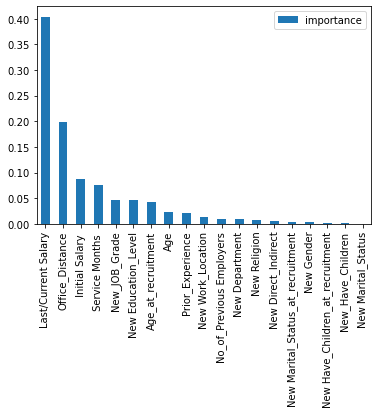

In [166]:
feature_importance.plot.bar()

In [167]:
pd.cut(updated_dataset.Last/Current Salary,bins=[0,16000,20000,24000,28000,32000,36000,40000],labels=['0-16000','16001-20000','20001-24000','24001-28000','28001-32000','32001-36000','36001-40000'])


SyntaxError: invalid syntax (<ipython-input-167-024db1d20771>, line 1)